**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

**Importing all the important libraries**

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

 **Data Reading/Data Understanding**

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip "/content/gdrive/MyDrive/CNN_assignment.zip"

Archive:  /content/gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating

**Defining the path for train and test images**

In [4]:
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

Train images:	 2239
Test images:	 118


**Dataset Creation**

Create train & validation dataset from the train directory with a batch size of 32. Also resizing images to 180*180.

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Using 80% of the images for training, and 20% for validation.

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


**List out all the classes of skin cancer and store them in a list.**

In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


**Dataset Visualisation**

Visualize one instance of all the nine classes present in the dataset

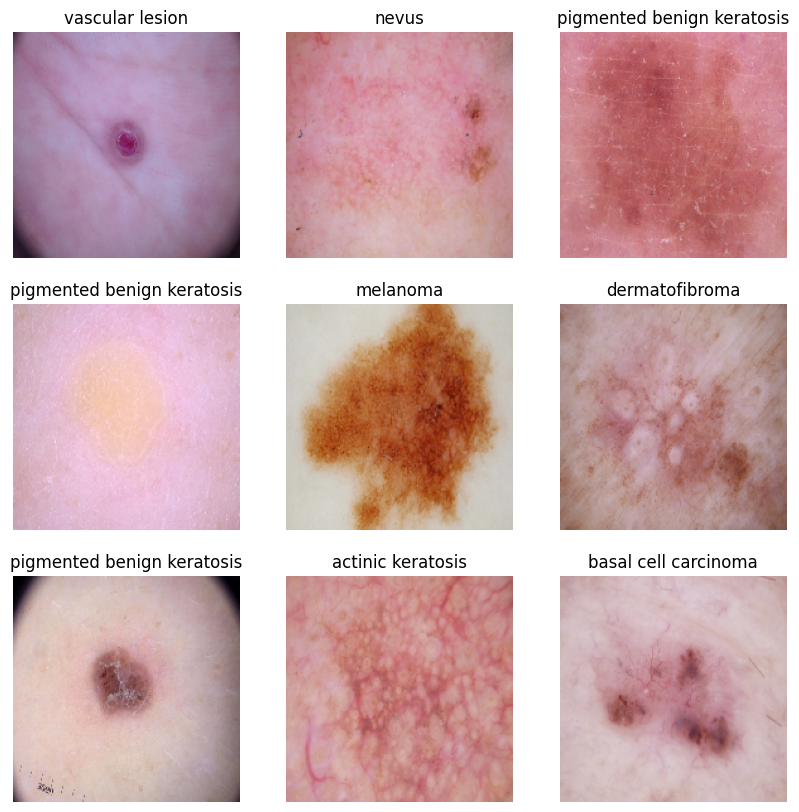

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Model Building & training**



*   Create a CNN model, which can accurately detect 9 classes present in the
dataset. While building the model, rescale images to normalize pixel values between (0,1).
*   Choose an appropriate optimiser and loss function for model training .
*   Train the model







In [19]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

**Compile the model**

Choose an appropirate optimiser and loss function for model training

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 45, 45, 64)       

**Train the model**

In [22]:
epochs = 25
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
56/56 [==============================] - 111s 2s/step - loss: 2.0371 - accuracy: 0.2227 - val_loss: 1.9556 - val_accuracy: 0.2729
Epoch 2/25
56/56 [==============================] - 85s 2s/step - loss: 1.8912 - accuracy: 0.2913 - val_loss: 1.8323 - val_accuracy: 0.2886
Epoch 3/25
56/56 [==============================] - 84s 1s/step - loss: 1.7565 - accuracy: 0.3438 - val_loss: 1.6938 - val_accuracy: 0.3960
Epoch 4/25
56/56 [==============================] - 85s 2s/step - loss: 1.7063 - accuracy: 0.3789 - val_loss: 1.6187 - val_accuracy: 0.4653
Epoch 5/25
56/56 [==============================] - 83s 1s/step - loss: 1.5959 - accuracy: 0.4314 - val_loss: 1.5391 - val_accuracy: 0.4564
Epoch 6/25
56/56 [==============================] - 80s 1s/step - loss: 1.4888 - accuracy: 0.4766 - val_loss: 1.4879 - val_accuracy: 0.4944
Epoch 7/25
56/56 [==============================] - 83s 1s/step - loss: 1.4502 - accuracy: 0.4894 - val_loss: 1.4271 - val_accuracy: 0.5101
Epoch 8/25
56/56 [=

**Visualizing the results**

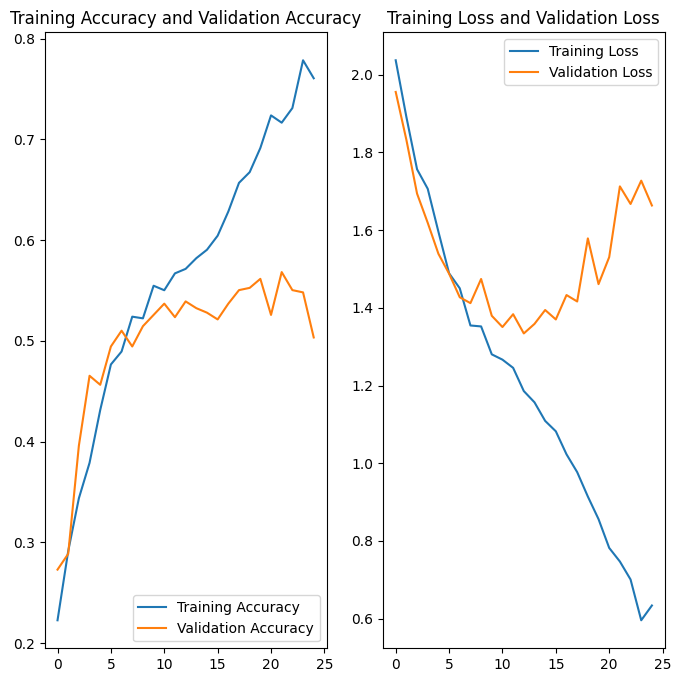

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss and Validation Loss')
plt.show()

**Findings:**


*   Training accuracy is around 76% but validation accuracy is 50%. The model is overfitting because of high variance between train and validation data set.
*   Model is overfitting because the loss on training set is low as compared to validation set.




**Choose an appropriate data augumentation strategy.**

In [26]:
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(0.2, fill_mode='reflect')
])

**Visualizing how the augmentation strategy works for training image.**

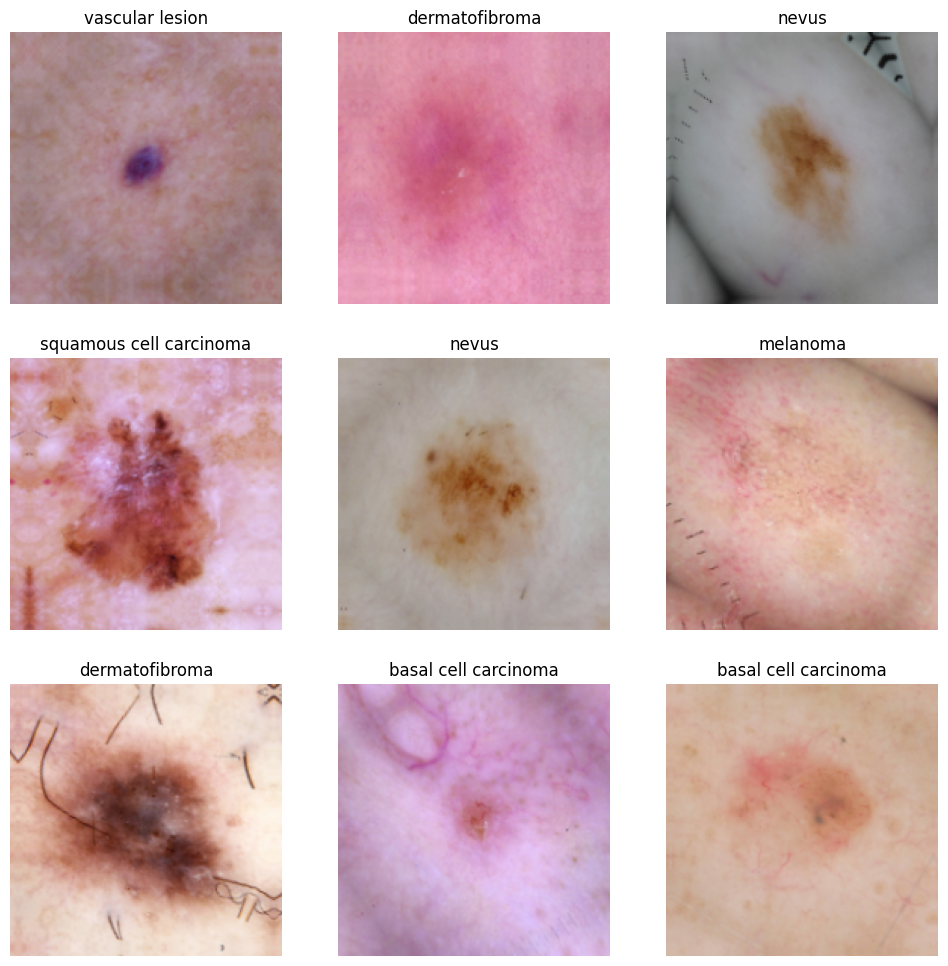

In [27]:

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Using Dropout layer if there is an evidence of overfitting**

In [28]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9

**Create the model, compile and train the model with dropout layer**

In [29]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes)
])

**Compile the model**

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the model**

In [31]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 92s 2s/step - loss: 2.0153 - accuracy: 0.2188 - val_loss: 1.8699 - val_accuracy: 0.2662
Epoch 2/20
56/56 [==============================] - 83s 1s/step - loss: 1.6945 - accuracy: 0.3929 - val_loss: 1.6539 - val_accuracy: 0.4049
Epoch 3/20
56/56 [==============================] - 87s 2s/step - loss: 1.6319 - accuracy: 0.4169 - val_loss: 1.5809 - val_accuracy: 0.4497
Epoch 4/20
56/56 [==============================] - 82s 1s/step - loss: 1.5262 - accuracy: 0.4559 - val_loss: 1.4768 - val_accuracy: 0.5168
Epoch 5/20
56/56 [==============================] - 83s 1s/step - loss: 1.4398 - accuracy: 0.5000 - val_loss: 1.4940 - val_accuracy: 0.4855
Epoch 6/20
56/56 [==============================] - 86s 2s/step - loss: 1.3755 - accuracy: 0.5100 - val_loss: 1.4428 - val_accuracy: 0.4989
Epoch 7/20
56/56 [==============================] - 82s 1s/step - loss: 1.3372 - accuracy: 0.5212 - val_loss: 1.4067 - val_accuracy: 0.5078
Epoch 8/20
56/56 [==

**Visualize the results**

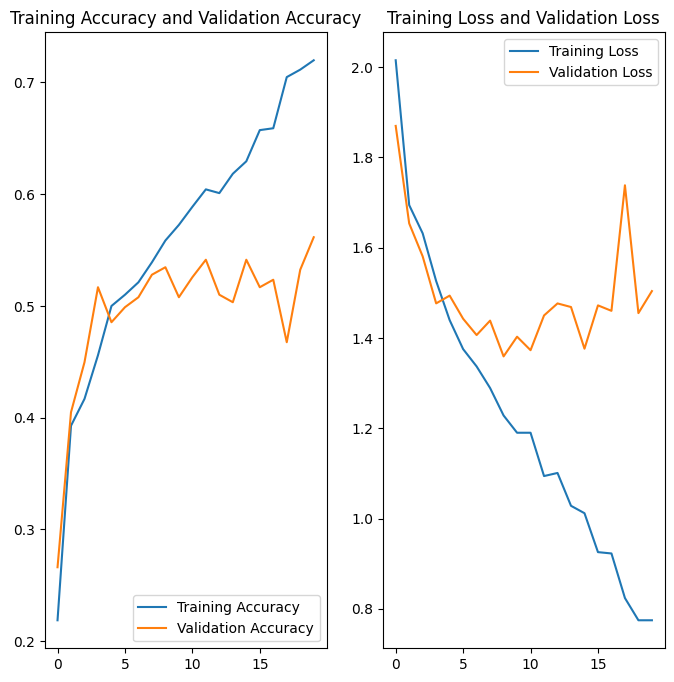

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss and Validation Loss')
plt.show()

**Findings :**


*   Slight reduction in overfitting of the model is seen.With the previous model Validation accuracy was 50%. Now it has increased to 56%.
*   The model needs to be optimised using data augmentation to see if overfitting can be reduced.




**Finding the distribution of classes in the training dataset.**

In [33]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [34]:
path_list=[]
lesion_list=[]
for i in class_names:

    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


**Visualize the distribution of classes in the data.**

<BarContainer object of 9 artists>

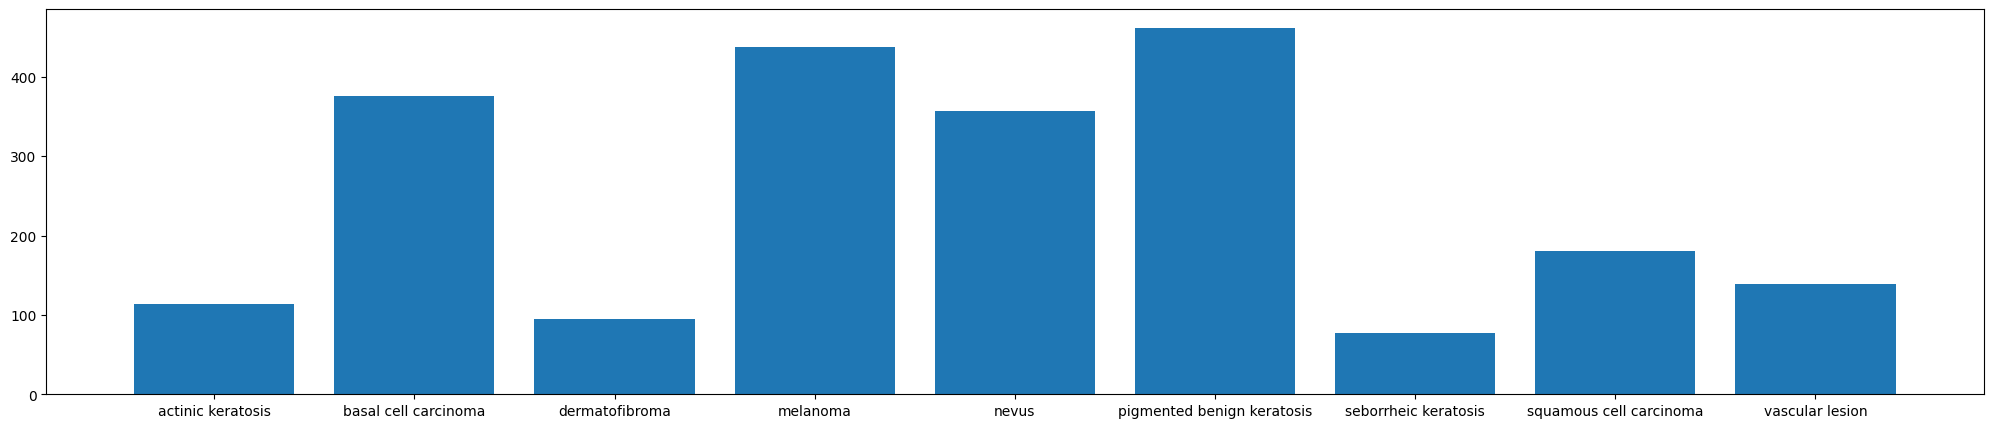

In [40]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,5))
plt.bar(class_names,count)

In [47]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X, y = original_df['Path'], original_df['Label']

y = LabelEncoder().fit_transform(y)

counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))



Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


**Which class has the least number of samples?**
Seborrheic keratosis class has the least number of samples.

**Which classes dominate the data in terms of the proportionate number of samples?**
Pigmented benign keratosis & Melanoma classes dominate the data in terms of proportionate number of samples followed by basal cell carcinoma

**Install python package known as Augmentor to rectify class imbalances present in the training dataset**

In [48]:
!pip install Augmentor


*   Instantiate a Pipeline object pointing to a directory containing your initial image data set.

*   Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.




**Using Augmentor library we are adding 750 samples per class**

In [49]:
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(750)

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A69127B7AF0>: 100%|██████████| 750/750 [00:28<00:00, 25.87 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A69170DCEE0>: 100%|██████████| 750/750 [00:35<00:00, 21.30 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A69241086A0>: 100%|██████████| 750/750 [00:33<00:00, 22.69 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2304x1536 at 0x7A69173F4E50>: 100%|██████████| 750/750 [02:24<00:00,  5.20 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7A691721D660>: 100%|██████████| 750/750 [02:11<00:00,  5.70 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A6916F9BEB0>: 100%|██████████| 750/750 [00:26<00:00, 27.87 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7A6912783070>: 100%|██████████| 750/750 [01:08<00:00, 10.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A690C9E8B80>: 100%|██████████| 750/750 [00:28<00:00, 26.58 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A6916E7FE80>: 100%|██████████| 750/750 [00:27<00:00, 26.89 Samples/s]


**Below is the total count of augmented images.**

In [50]:
image_count_train1 = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train1)

6750


In [51]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025431.jpg_f0680b08-711f-4c7f-b309-f542a328b63d.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025099.jpg_31b222ce-dc7c-4efe-9f63-5ebca221ab53.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024782.jpg_a6b124cc-0972-4ae2-b1b1-f323b4eaaf84.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028404.jpg_8c14121f-5adc-4d8a-bfc5-657e1a533cc0.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027454.jpg_5efa1386-db2d-4e05-a110-7b5da506ad78.jpg',


In [52]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [53]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [54]:
dataframe_dict_new

{'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025431.jpg_f0680b08-711f-4c7f-b309-f542a328b63d.jpg': 'pigmented benign keratosis',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025099.jpg_31b222ce-dc7c-4efe-9f63-5ebca221ab53.jpg': 'pigmented benign keratosis',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0024782.jpg_a6b124cc-0972-4ae2-b1b1-f323b4eaaf84.jpg': 'pigmented benign keratosis',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028404.jpg_8c14121f-5adc-4d8a-bfc5-657e1a533cc0.jpg': 'pigmented benign keratosis',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented 

In [55]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-55-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


**Distribution of data in the original training data set after adding augmented data.**

In [56]:
new_df['Label'].value_counts()

pigmented benign keratosis    1212
melanoma                      1188
basal cell carcinoma          1126
nevus                         1107
squamous cell carcinoma        931
vascular lesion                889
actinic keratosis              864
dermatofibroma                 845
seborrheic keratosis           827
Name: Label, dtype: int64

**Train the model on the data created using Augmentor**

In [57]:
batch_size = 32
img_height = 180
img_width = 180

**Train dataset**

In [58]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8989 files belonging to 9 classes.
Using 7192 files for training.


**Validation dataset**

In [59]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8989 files belonging to 9 classes.
Using 1797 files for validation.


In [60]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Create model**

In [61]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation = "softmax")
])

**Compile the model**

In [62]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the model**

In [63]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 381s 2s/step - loss: 1.9466 - accuracy: 0.2449 - val_loss: 1.7112 - val_accuracy: 0.3472
Epoch 2/20
225/225 [==============================] - 346s 2s/step - loss: 1.5508 - accuracy: 0.4003 - val_loss: 1.4275 - val_accuracy: 0.4524
Epoch 3/20
225/225 [==============================] - 325s 1s/step - loss: 1.3432 - accuracy: 0.4857 - val_loss: 1.2653 - val_accuracy: 0.5086
Epoch 4/20
225/225 [==============================] - 345s 2s/step - loss: 1.2062 - accuracy: 0.5353 - val_loss: 1.0881 - val_accuracy: 0.5743
Epoch 5/20
225/225 [==============================] - 341s 2s/step - loss: 0.9998 - accuracy: 0.6185 - val_loss: 0.9120 - val_accuracy: 0.6589
Epoch 6/20
225/225 [==============================] - 342s 2s/step - loss: 0.8199 - accuracy: 0.6954 - val_loss: 0.7804 - val_accuracy: 0.7162
Epoch 7/20
225/225 [==============================] - 344s 2s/step - loss: 0.6905 - accuracy: 0.7400 - val_loss: 0.7778 - val_accuracy: 0.7190
Epoch 8/20

**Visualize the model results**

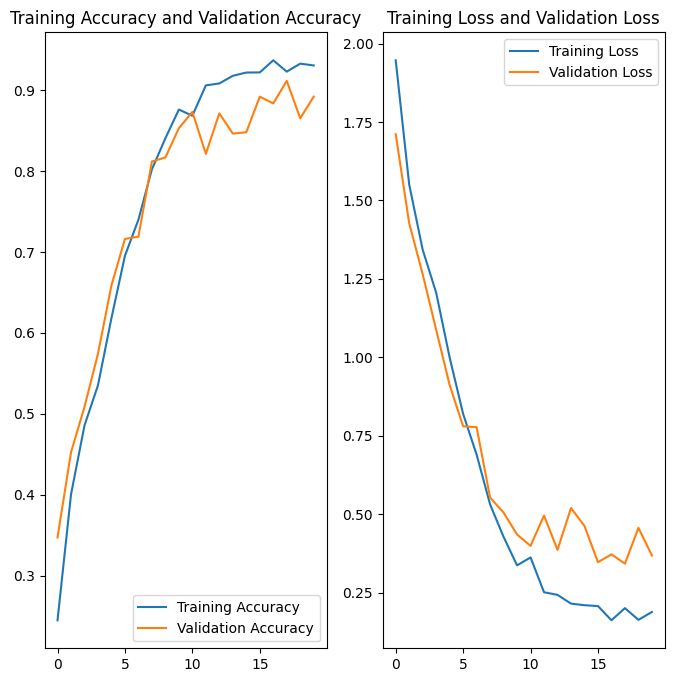

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training Loss and Validation Loss')
plt.show()

**Findings :**
Overfitting of the model has reduced to a great extent. Validation accuracy is 89%. The model displays low bias and low variance.
Using the augmetor library we have overcome class imbalance in the data and also providing the model with more data to learn from.